## Hotel Booking Project
### BY : **David Emad**.

### Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#feature">Feature Engineering</a></li>
<li><a href="#Data visulization">Data visulization</a></li>
<li><a href="#Modeling">Modeling</a></li>
<li><a href="#Pipe line">Pipeline</a></li>


</ul>

In [2]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sns.set(rc={'figure.figsize':(15,7.5)})
from datetime import datetime

In [3]:
#Read Data
df = pd.read_csv("hotel_booking_Fixed.csv")

In [4]:
df["booking_changes"].value_counts()

booking_changes
0     64923
1      9592
2      3195
3       775
4       320
5        97
6        51
7        26
8        12
9         7
10        6
13        4
14        3
15        3
16        2
12        1
17        1
18        1
11        1
Name: count, dtype: int64

In [4]:
#Display The Maximum number of columns
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id='wrangling'></a>
## Data Wrangling

In [4]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [5]:
#Drop Dublicated data
df.drop_duplicates(inplace=True)

In [6]:
#Informations of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [7]:
#Number of null values for each column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [8]:
# too many missing values in copmany column & agent 
# so we will drop it
df.drop('company', axis=1, inplace=True)
df.drop('agent', axis=1, inplace=True)

In [9]:
#Country is a categorical so we will use mode to fill the NaN
df["country"].fillna(df["country"].mode()[0],inplace=True)

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
#Undefined/SC – no meal package
df["meal"].replace("Undefined", "SC", inplace=True)

In [12]:
df["children"].value_counts()

children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [13]:
#Sort values for children
df.sort_values('children',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12
93710,City Hotel,0,99,2016,July,30,22,1,2,2,3.0,0,BB,DNK,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,269.30,0,2,Check-Out,2016-07-25
70930,City Hotel,1,109,2017,June,26,25,2,1,2,3.0,0,BB,CN,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,255.00,0,3,Canceled,2017-04-03
116150,City Hotel,0,51,2017,July,28,11,0,4,2,3.0,0,BB,MEX,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,321.50,0,1,Check-Out,2017-07-15
25824,Resort Hotel,0,22,2016,August,36,31,2,4,2,3.0,0,HB,PRT,Online TA,TA/TO,1,0,1,G,G,1,No Deposit,0,Transient,311.33,1,2,Check-Out,2016-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.00,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.00,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,18.00,0,2,Canceled,2015-08-04


In [14]:
#drop irrational data
df.drop(328, axis=0, inplace=True)

In [15]:
df["babies"].value_counts()

babies
0     86481
1       897
2        15
10        1
9         1
Name: count, dtype: int64

In [16]:
df.sort_values('babies',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14
104351,City Hotel,0,19,2017,January,2,8,2,2,2,0.0,2,BB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient,119.50,0,0,Check-Out,2017-01-12
37302,Resort Hotel,0,1,2017,June,24,11,2,0,2,0.0,2,HB,PRT,Online TA,TA/TO,0,0,0,A,C,1,No Deposit,0,Transient,201.00,1,1,Check-Out,2017-06-13
84429,City Hotel,0,1,2016,February,9,25,0,1,2,1.0,2,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,227.00,0,3,Check-Out,2016-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35146,Resort Hotel,0,0,2017,April,15,13,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,0,Transient,105.00,0,0,Check-Out,2017-04-14
35145,Resort Hotel,0,28,2017,April,15,9,2,3,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,C,F,0,No Deposit,0,Transient,158.00,1,0,Check-Out,2017-04-14
35144,Resort Hotel,0,68,2017,April,15,13,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,85.00,0,2,Check-Out,2017-04-14
35143,Resort Hotel,0,10,2017,April,15,9,2,3,1,0.0,0,HB,KAZ,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,102.00,0,0,Check-Out,2017-04-14


In [17]:
#drop irrational data
df.drop([46619,78656], axis=0, inplace=True)

In [18]:
#Children is float so we need to convert it to int and fill missing data by zero
df["children"]=df["children"].fillna(0.0).astype(int)

In [19]:
#convert reservation status date to date format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y/%m/%d', errors='coerce')

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,NaT
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,NaT
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,NaT
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,NaT
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,NaT
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,NaT
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,NaT
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,NaT


In [21]:
df["adr"].value_counts(ascending=False)

adr
0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
31.60        1
55.11        1
33.65        1
31.41        1
157.71       1
Name: count, Length: 8878, dtype: int64

In [22]:
adr_index =pd.DataFrame(df.loc[df['adr'] == 0.00]).index

In [23]:
#Drop Zeros in adr
df.drop(adr_index, axis=0, inplace=True)

In [24]:
df["distribution_channel"].value_counts()

distribution_channel
TA/TO        68302
Direct       12226
Corporate     4905
GDS            177
Undefined        5
Name: count, dtype: int64

In [25]:
distribution_channel_index = df.loc[df['distribution_channel'] == "Undefined"].index

In [26]:
#Drop undefined Distribution Channel
df.drop(distribution_channel_index, axis=0, inplace=True)

In [27]:
df["reservation_status"].value_counts()

reservation_status
Check-Out    61775
Canceled     22847
No-Show        988
Name: count, dtype: int64

In [28]:
reservation_status_index = df.loc[df['reservation_status'] == "No-Show"].index

In [29]:
#Drop No-Show rows in Reservation Status
df.drop(reservation_status_index, axis=0, inplace=True)

In [30]:
lead_time_index = df.loc[df['lead_time'] == 0].index

In [31]:
#Drop rows in Lead Time that have zero
df.drop(lead_time_index , axis=0,inplace = True)

<Axes: xlabel='adr'>

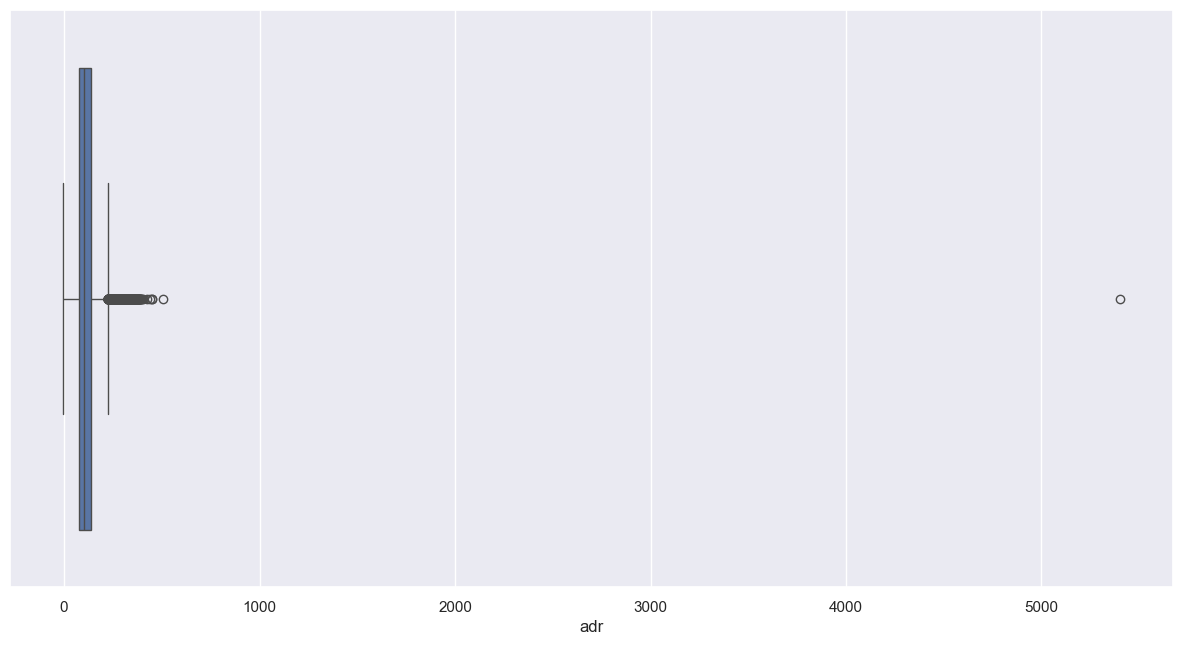

In [32]:
sns.boxplot(x="adr",data=df)

In [33]:
df.sort_values('adr',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,NaT
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,0,0,BB,PRT,Corporate,Corporate,1,0,1,A,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,NaT
103912,City Hotel,0,81,2016,December,53,31,1,1,2,2,0,BB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,NaT
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,450.00,0,0,Canceled,NaT
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,2,0,FB,PRT,Direct,Direct,0,0,0,H,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47466,City Hotel,1,4,2016,February,9,23,0,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,1.00,0,0,Canceled,NaT
83688,City Hotel,0,59,2016,February,6,6,2,2,1,0,0,BB,AUT,Groups,TA/TO,0,0,0,A,B,0,No Deposit,0,Transient-Party,1.00,0,0,Check-Out,NaT
47427,City Hotel,1,37,2016,February,8,20,4,8,1,0,0,BB,AGO,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,0.50,0,0,Canceled,NaT
35059,Resort Hotel,0,80,2017,March,10,5,12,26,2,0,0,SC,GBR,Groups,TA/TO,0,0,0,D,I,10,No Deposit,0,Transient-Party,0.26,0,0,Check-Out,NaT


In [34]:
df.drop([48515,14969] , axis=0,inplace = True)

In [35]:
adult_index = df.loc[df['adults'] < 1].index

In [36]:
adult_index

Index([ 31765,  40984,  41048,  41446,  45158,  46132,  46150,  46186,  46196,
        46220,
       ...
       116251, 116534, 116558, 117128, 117130, 117204, 117274, 117303, 117453,
       118200],
      dtype='int64', length=233)

In [37]:
df.drop(adult_index , axis=0,inplace = True)

In [38]:
df["required_car_parking_spaces"].value_counts()

required_car_parking_spaces
0    72608
1     6385
2       24
3        3
8        2
Name: count, dtype: int64

In [39]:
df.sort_values("required_car_parking_spaces",ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,0,Transient-Party,40.00,8,1,Check-Out,NaT
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,122,Transient-Party,80.00,8,0,Check-Out,NaT
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.00,3,0,Check-Out,NaT
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,0,Transient,111.00,3,0,Check-Out,NaT
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,153.33,3,2,Check-Out,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,Resort Hotel,0,14,2017,August,31,5,2,2,2,0,0,BB,AUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,228.50,0,2,Check-Out,NaT
39143,Resort Hotel,0,102,2017,August,32,7,1,1,2,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,0,Transient,184.00,0,1,Check-Out,NaT
39142,Resort Hotel,0,91,2017,August,31,2,2,5,3,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Contract,159.28,0,0,Check-Out,NaT
39141,Resort Hotel,0,85,2017,August,31,4,2,3,2,0,0,BB,ARG,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,197.93,0,0,Check-Out,NaT


In [40]:
df.drop([29045,29046],axis=0,inplace=True)

In [41]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,79020.000000,0
mean,0.285244,86.406606,2016.226398,26.951822,15.826500,1.055961,2.747684,1.903645,0.139395,0.010744,0.026981,0.029132,0.148418,0.265857,0.801784,109.784108,0.081524,0.725399,NaT
min,0.000000,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,NaT
25%,0.000000,17.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,NaT
50%,0.000000,58.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.000000,NaT
75%,1.000000,133.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.807500,0.000000,1.000000,NaT
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,2.000000,1.000000,26.000000,71.000000,18.000000,391.000000,508.000000,3.000000,5.000000,NaT
std,0.451534,86.187236,0.681815,13.438051,8.835167,1.031923,2.032940,0.486135,0.453365,0.104921,0.162027,0.368238,1.600430,0.708639,10.396613,50.187803,0.275161,0.837560,NaN


<a id='feature'></a>
## Feature Engineering

In [42]:
#collect arrival date in one column
df['arrival_date'] = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)

In [43]:
#convert arrival date to date format
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y/%B/%d', errors='coerce')

In [44]:
#Total Guests
df["Total_Guests"]=df["adults"]+df["children"]

In [45]:
#Total Guests that has 0 guests
total_guests_index = df.loc[df['Total_Guests'] == 0].index

In [46]:
#Drop rows of total guests that have zero values 
df.drop(total_guests_index, axis=0, inplace=True)

In [47]:
#function for seasons
def season(x):
    if x in ['December','January','February']:
        return "Winter"
    if x in['March','April','May']:
        return "Spring"
    if x in['June','July', 'August']:
        return "Summer"
    if x in['September', 'October', 'November']:
        return "Autum"

In [48]:
#New column of seasons
df['Seasons']=df['arrival_date_month'].apply(season)

In [49]:
#Create new column named Total Days
df["Total_Days"]=df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

### Visualisasi


In [ ]:
resort_hotel_df = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel_df =df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [ ]:
sns.barplot(data = city_hotel_df , x='Seasons' , y ='adr')
plt.title("Average Room price per night and person over the season in City", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [ ]:
sns.barplot(data = resort_hotel_df , x='Seasons' , y ='adr')
plt.title("Average Room price per night and person over the season in Resort", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [ ]:
resort_month=resort_hotel_df.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_month=city_hotel_df.groupby(["arrival_date_month"])["adr"].mean().reset_index()
ordered_months = ["January", "February", "March", "April", "May", "June",
"July", "August", "September", "October", "November", "December"]
resort_month.index = pd.CategoricalIndex(resort_month["arrival_date_month"],categories = ordered_months,ordered=True)
city_month.index = pd.CategoricalIndex(city_month["arrival_date_month"],categories = ordered_months,ordered=True)

In [ ]:
resort_month = resort_month.sort_index()
city_month = city_month.sort_index()

In [ ]:
sns.barplot(data = city_month , x='arrival_date_month' , y ='adr')
plt.xlabel("Month in city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [ ]:
sns.barplot(data = resort_month , x='arrival_date_month' , y ='adr')
plt.xlabel("Month in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [ ]:
resort_room=resort_hotel_df.groupby(["reserved_room_type"])["adr"].mean().reset_index()
city_room=city_hotel_df.groupby(["reserved_room_type"])["adr"].mean().reset_index()
ordered_room = ["A","B","C","D","E","F","G","H"]
resort_room.index = pd.CategoricalIndex(resort_room["reserved_room_type"],categories = ordered_room,ordered=True)
city_room.index = pd.CategoricalIndex(city_room["reserved_room_type"],categories = ordered_room,ordered=True)
resort_room = resort_room.sort_index()
city_room = city_room.sort_index()

In [ ]:
sns.barplot(data = city_room , x='reserved_room_type' , y ='adr')
plt.xlabel("room in city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

In [ ]:
sns.barplot(data = resort_room , x='reserved_room_type' , y ='adr')
plt.xlabel("room in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

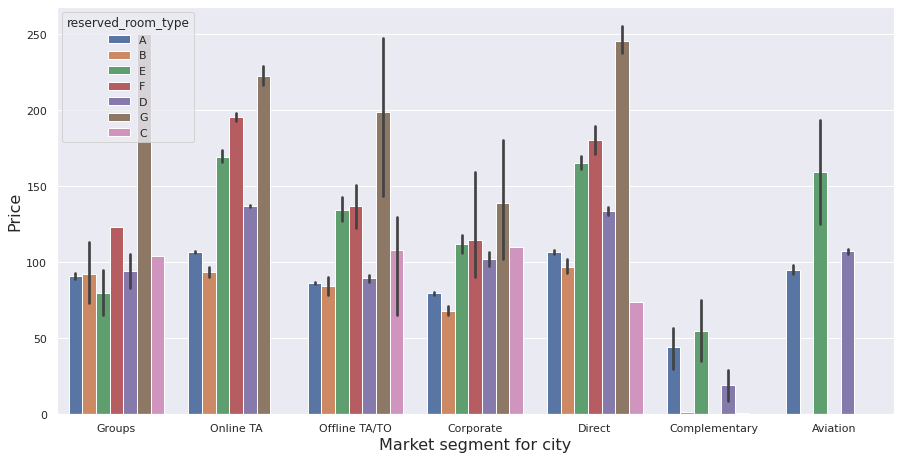

In [ ]:
sns.barplot(data = city_hotel_df , x='market_segment' , y ='adr',hue="reserved_room_type")
plt.xlabel("Market segment for city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

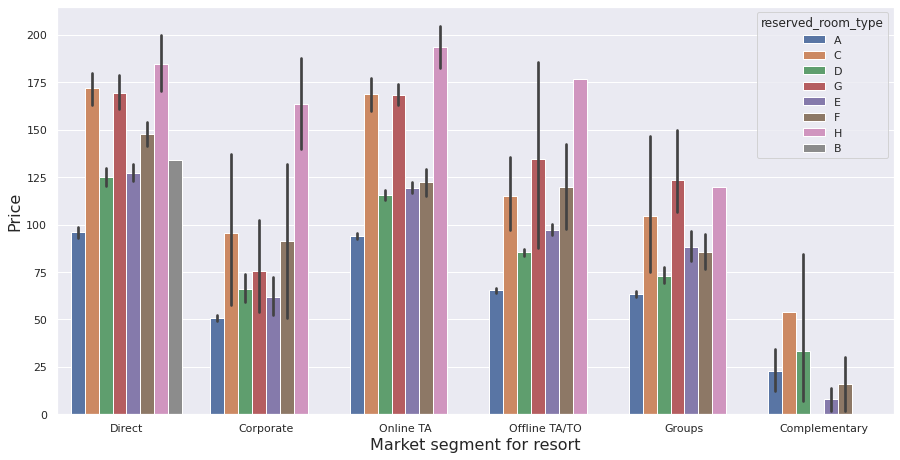

In [ ]:
sns.barplot(data = resort_hotel_df , x='market_segment' , y ='adr',hue="reserved_room_type")
plt.xlabel("Market segment for resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

<a id='Modeling'></a>
# Modeling

In [50]:
df['reservation_status'] = df['reservation_status'].astype('category')
y = df['reservation_status'].cat.codes
y_names = list(df['reservation_status'].cat.categories)
X = df.drop(columns=['reservation_status'])

### Feature Selection

In [51]:
X.drop(["country","is_canceled",'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month',"meal","assigned_room_type","adr","required_car_parking_spaces","reservation_status_date","adults","children","babies","days_in_waiting_list","arrival_date","Total_Days"],axis=1,inplace=True)

In [52]:
X = pd.get_dummies(X, drop_first=True)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

### Feature sacling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### SVM

In [56]:
start_time = datetime.now()
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm = SVC(kernel='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print(classification_report(svm.predict(x_train_scaled),y_train))
print(classification_report(y_pred,y_test))
print(datetime.now())
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

              precision    recall  f1-score   support

           0       0.45      0.70      0.55     11733
           1       0.92      0.81      0.86     51483

    accuracy                           0.79     63216
   macro avg       0.69      0.75      0.71     63216
weighted avg       0.83      0.79      0.80     63216

              precision    recall  f1-score   support

           0       0.46      0.70      0.55      2952
           1       0.92      0.81      0.86     12852

    accuracy                           0.79     15804
   macro avg       0.69      0.75      0.71     15804
weighted avg       0.83      0.79      0.80     15804

2024-02-01 20:33:39.690899
0:10:38.045642


In [57]:
start_time = datetime.now()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold =KFold(n_splits=3)
scores = cross_validate(svm,x_train_scaled,y_train,cv=kfold)
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

0:10:01.370507


In [58]:
scores

{'fit_time': array([157.59347534, 146.52922964, 150.79084873]),
 'score_time': array([48.10218   , 50.5794735 , 47.76709127]),
 'test_score': array([0.78573462, 0.77975513, 0.78540243])}

In [59]:
start_time = datetime.now()
from sklearn.model_selection import GridSearchCV
param = {'C':[1,2,3],'kernel':['linear','rbf',]}
svm = SVC()
grid_search =GridSearchCV(svm,param_grid=param,scoring='accuracy',cv = 3)
grid_search.fit(x_train_scaled,y_train)
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

13:25:11.306223


In [60]:
grid_search.best_params_

{'C': 3, 'kernel': 'rbf'}

In [61]:
from sklearn.svm import SVC
svm = SVC(C=3,kernel ='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.46      0.56      4508
           1       0.81      0.92      0.86     11296

    accuracy                           0.79     15804
   macro avg       0.76      0.69      0.71     15804
weighted avg       0.78      0.79      0.78     15804



### Pipeline


In [ ]:
X = df.drop(columns=['reservation_status'])

In [ ]:
X.drop(["country","is_canceled",'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month',"meal","assigned_room_type","adr","required_car_parking_spaces","reservation_status_date","adults","children","babies","days_in_waiting_list","arrival_date"],axis=1,inplace=True)

In [ ]:
y = df['reservation_status'].cat.codes

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
numeric_columns = x_train.select_dtypes(exclude='object').columns

In [ ]:
cat_columns = x_train.select_dtypes(include='object').columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler(with_mean=False))])
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                            ('onehot', OneHotEncoder()),
                            ('scaler', StandardScaler(with_mean=False))])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
     transformers=[
          ('num', numeric_transformer, numeric_columns),
          ('cat', cat_transformer, cat_columns)])

In [ ]:
preprocessor

In [ ]:
from sklearn.svm import SVC
pipe = Pipeline([('processing',preprocessor),('model',SVC(C=3,kernel ='rbf'))])
pipe.fit(x_train,y_train)

In [ ]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test,y_pred))

In [73]:
import joblib
save =  joblib.dump(pipe,'Hotel Prediction model.pkl')